### Project - Tree Methods Focus 


# Predicting Churn risk for a cable company


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## Part 1: Quick Data Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

There are not any null values in the dataframe.


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


At a quick statistical summary of the numeric columns we notice that many columns are categorical, meaning we will eventually need to convert them to dummy variables.

# Part 2:  Exploratory Data Analysis

## General Feature Exploration


In [6]:
df.isna().sum(axis=0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are not any NaN cells 


C:\Users\Damian\anaconda3\envs\tensorfpython36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


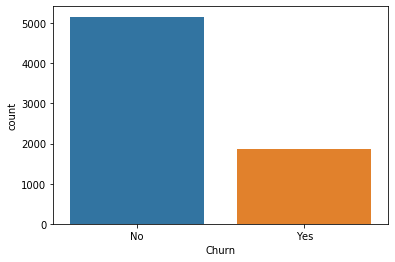

In [7]:
sns.countplot(df['Churn']);

Displaying the balance of the class labels we see some imbalance on the Churn values


In [8]:
columns = list(df.columns)

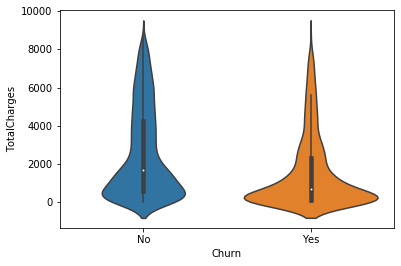

In [9]:
sns.violinplot(data=df,x='Churn',y='TotalCharges')

Exploring the distrbution of TotalCharges between Churn categories we see there are many people that churn with very little total charges 


In [10]:
np.array(columns)

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype='<U16')

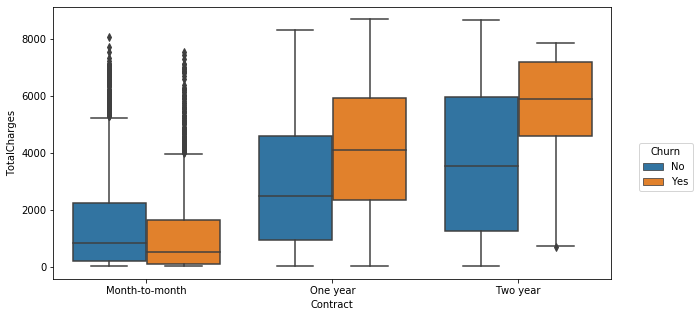

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn');
plt.legend(bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0.,title='Churn')

Showing the distribution of TotalCharges per Contract type

In [12]:
df_dummies = df.copy()

In [13]:
feat_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

In [14]:
df_dummies = pd.get_dummies(df_dummies[feat_columns])

In [15]:
df_dummies.head().T

,0,1,2,3,4
SeniorCitizen,0,0,0,0,0
gender_Female,1,0,0,0,1
gender_Male,0,1,1,1,0
Partner_No,0,1,1,1,1
Partner_Yes,1,0,0,0,0
Dependents_No,1,1,1,1,1
Dependents_Yes,0,0,0,0,0
PhoneService_No,1,0,0,1,0
PhoneService_Yes,0,1,1,0,1
MultipleLines_No,0,1,1,0,1


In [16]:
churn_correl_df = df_dummies.corr().drop('Churn_No',axis=1,errors='ignore')

In [17]:
np.array(churn_correl_df.columns)

array(['SeniorCitizen', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilli

In [18]:
churn_correl = churn_correl_df['Churn_Yes'].sort_values()
churn_correl = churn_correl.drop(['Churn_Yes','Churn_No'])
churn_correl

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

In [19]:
columns = churn_correl.index
columns

Index(['Contract_Two year', 'DeviceProtection_No internet service',
       'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'InternetService_No',
       'TechSupport_No internet service', 'OnlineBackup_No internet service',
       'OnlineSecurity_No internet service', 'PaperlessBilling_No',
       'Contract_One year', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'Dependents_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)', 'InternetService_DSL',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Mailed check',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'PhoneService_No', 'gender_Male',
       'gender_Female', 'PhoneService_Yes', 'MultipleLines_Yes',
       'StreamingMovies_Yes', 'StreamingTV_Yes', 'StreamingTV_No',
       'StreamingMovies_No', 'Partner_No', 'SeniorCitizen', 'Dependents_No',
       'PaperlessBilling_Yes', 'DeviceProtection_No', 'Online

In [20]:
print(len(columns))
print(len(churn_correl))

42
42


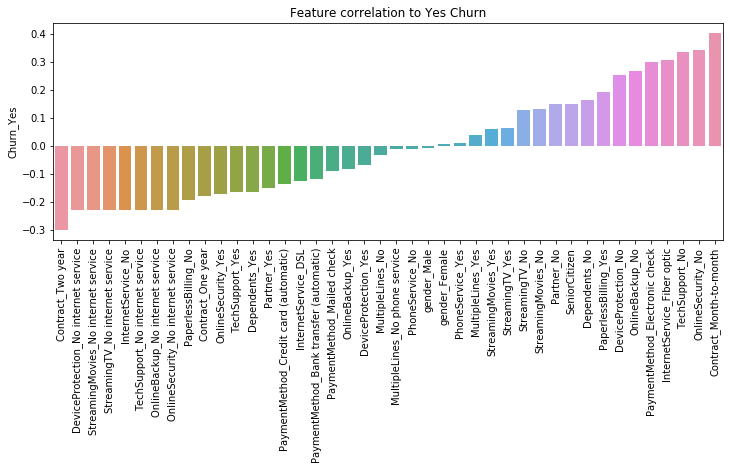

In [21]:
plt.figure(figsize=(12,4))
sns.barplot(x=columns, y=churn_correl)
plt.title('Feature correlation to Yes Churn')
plt.xticks(rotation=90);

Showing the correlation of all the features to the class label. It seems that contract month to month have the highest correlation to churn and, on the other hand contract by two year have the lowest



# Part 3: Churn Analysis



In [22]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

The 3 contract types available are per month, one year or two year.

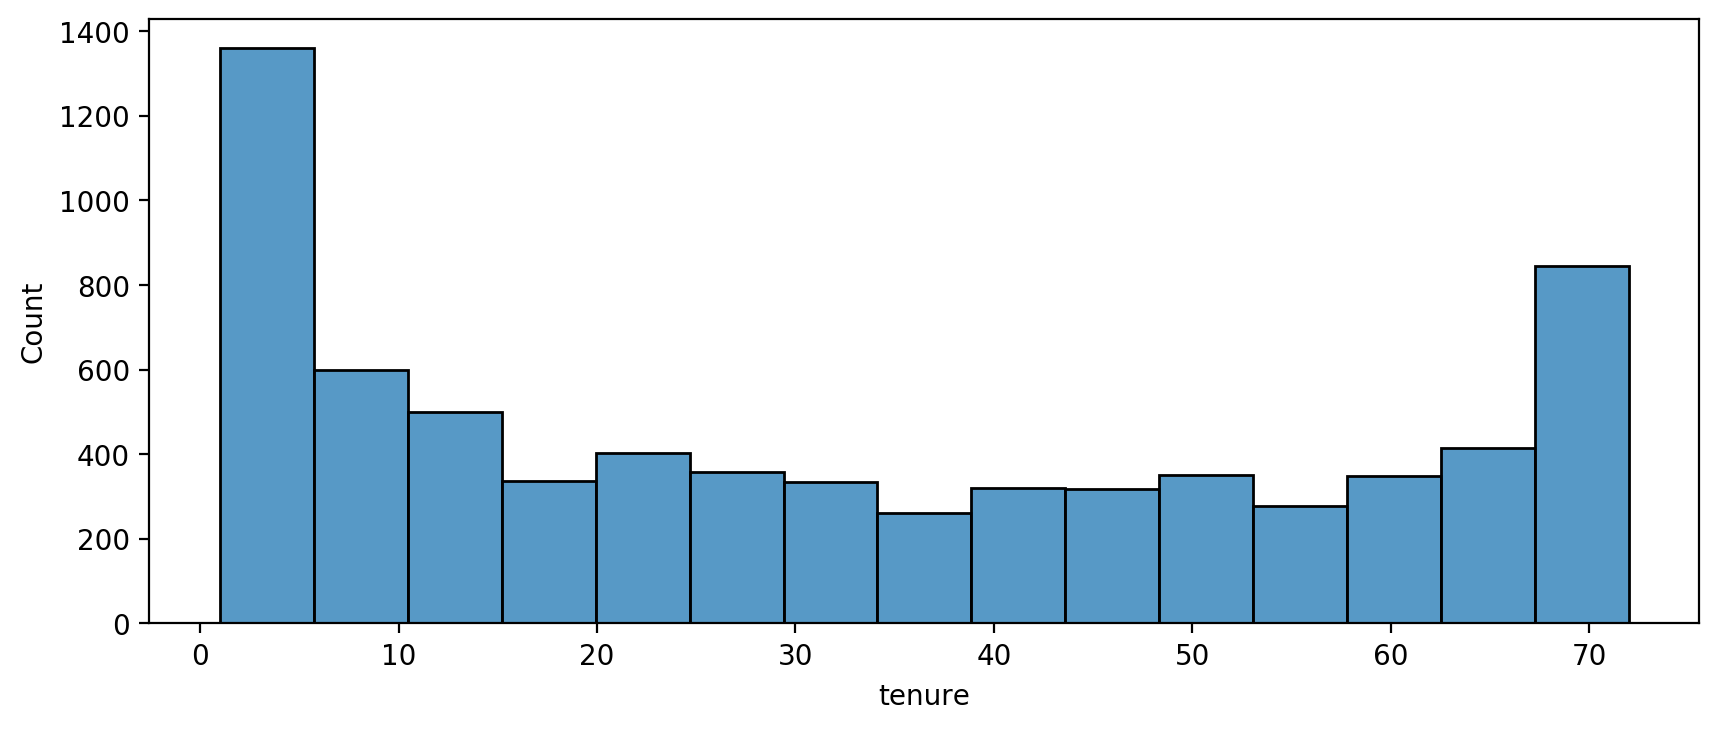

In [24]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(df['tenure'])

Displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer. Most people prefer tenure of the service for a few months or for a lot of months

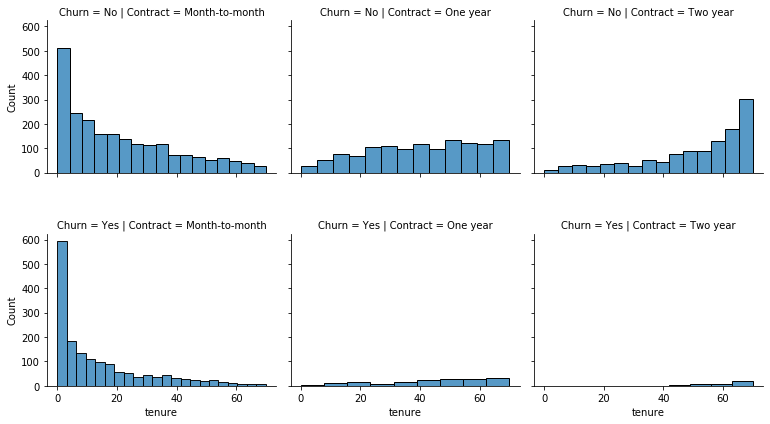

In [25]:
g = sns.FacetGrid(data=df,row='Churn',col='Contract',aspect=1.2)
g = g.map_dataframe(sns.histplot,'tenure',binrange=(0,70))
plt.subplots_adjust(hspace=0.4)

Histograms by churn and contract

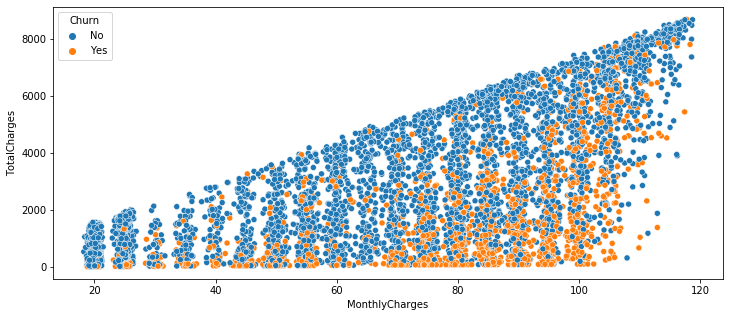

In [26]:
plt.figure(figsize=(12,5))
sns.scatterplot(y='TotalCharges',x='MonthlyCharges',data=df,hue='Churn')

Total Charges versus Monthly Charges, separated by churn


### Creating Cohorts based on Tenure



In [28]:
tenure = df['tenure'].unique()
print(len(tenure))
np.sort(tenure)

72


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72], dtype=int64)

In [29]:
df_dummy = df.copy()

In [30]:
# df.groupby('tenure')
df_dummy['Churn_yes'] = pd.get_dummies(df['Churn'])['Yes']
df_dummy.head()
# dummy = pd.get_dummies(df['Churn'])
# dummy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [31]:
# tenure = df['tenure'].unique()
sorted_tenure = np.sort(tenure)
percents = df_dummy.groupby('tenure').sum()['Churn_yes']/df_dummy.groupby('tenure').count()['Churn_yes']
percents = percents*100
tenure_serie = pd.Series(index=sorted_tenure,data=percents)
tenure_serie.head()

1    61.990212
2    51.680672
3    47.000000
4    47.159091
5    48.120301
Name: Churn_yes, dtype: float64

Treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort we calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. We see a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.

Text(0, 0.5, 'Churn percentage')

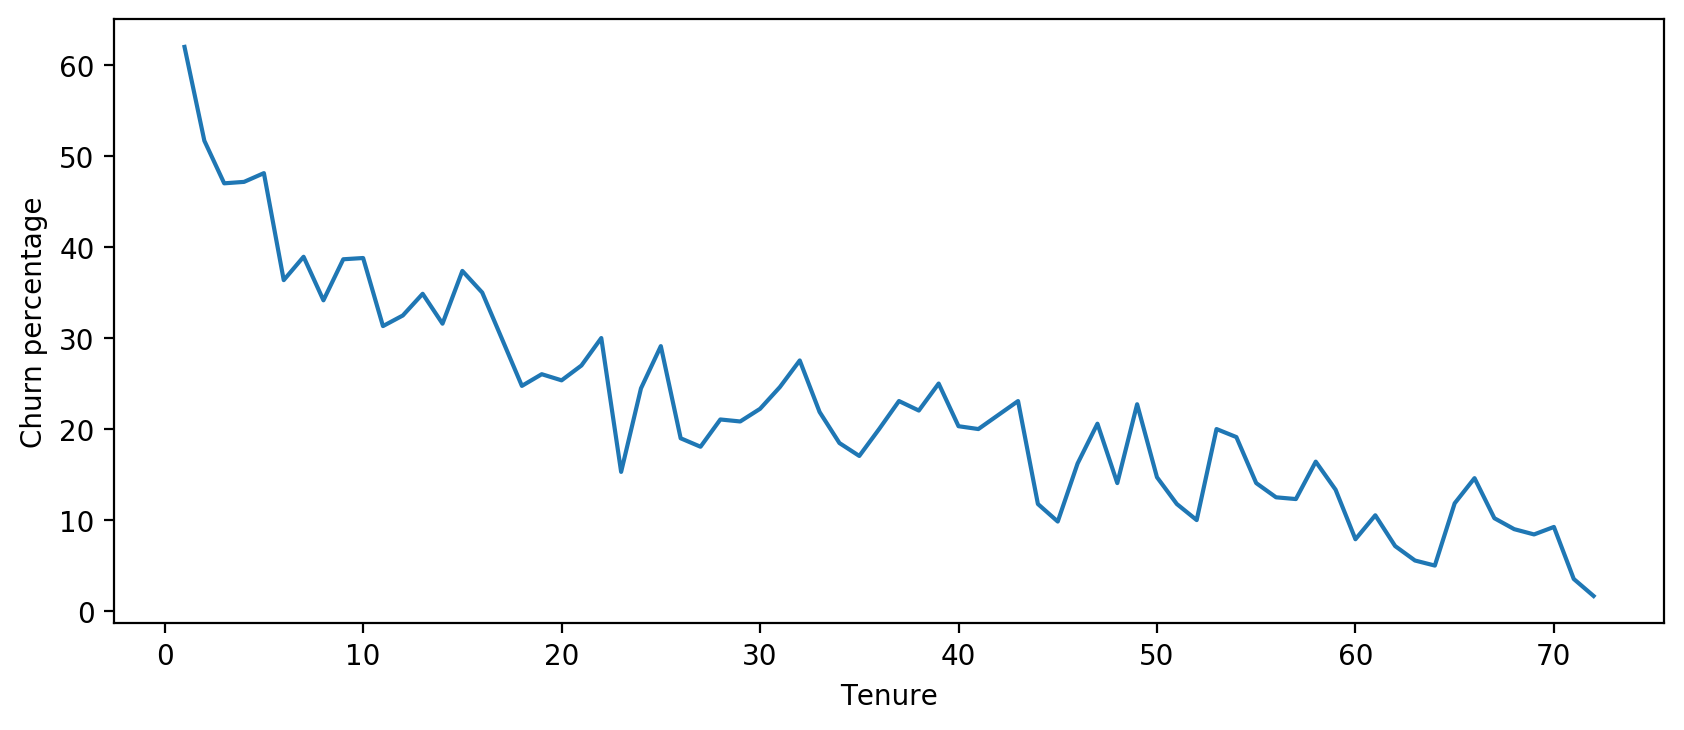

In [32]:
plt.figure(figsize=(10,4),dpi=200)
plt.plot(sorted_tenure ,tenure_serie.values)
plt.xlabel('Tenure')
plt.ylabel('Churn percentage')

Churn rate per months of tenure. We see people with less tenure they have more churn percentage

### Broader Cohort Groups


In [33]:
df_4cat_tenure = df.copy()

In [34]:
def separate_tenure_cat(tenr):
    if tenr <=12:
        return '0-12 Months'
    elif 12 < tenr <= 24:
        return '12-24 Months'
    elif 24 < tenr <= 48:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [116]:
separate_tenure_cat(20)

'12-24 Months'

In [35]:
df_4cat_tenure = pd.DataFrame(df_4cat_tenure)
df_4cat_tenure['Tenure Cohort'] = df_4cat_tenure['tenure'].apply(separate_tenure_cat)
df_4cat_tenure[['tenure','Tenure Cohort']].head()

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months


,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


In [37]:
df_4cat_tenure.drop('Tenure_Cohort',axis=1,inplace=True,errors='ignore')
df_4cat_tenure.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure Cohort'],
      dtype='object')

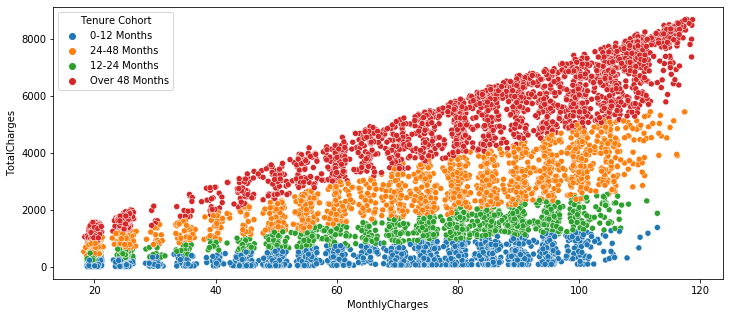

In [38]:
plt.figure(figsize=(12,5))
sns.scatterplot(y='TotalCharges',x='MonthlyCharges',data=df_4cat_tenure,hue='Tenure Cohort')

Total Charges versus Monthly Charts, separated by Tenure Cohort

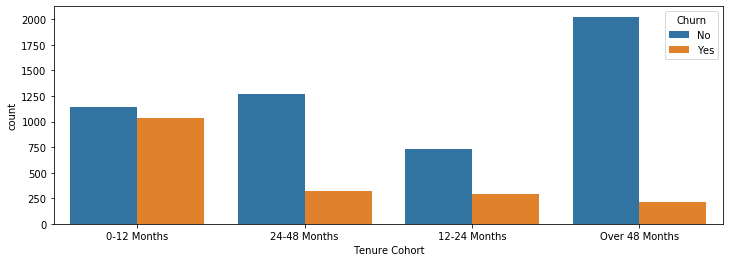

In [39]:
plt.figure(figsize=(12,4))
sns.countplot(data=df_4cat_tenure,hue='Churn',x='Tenure Cohort')

Churn count per cohort. The more months of tenure the less churn


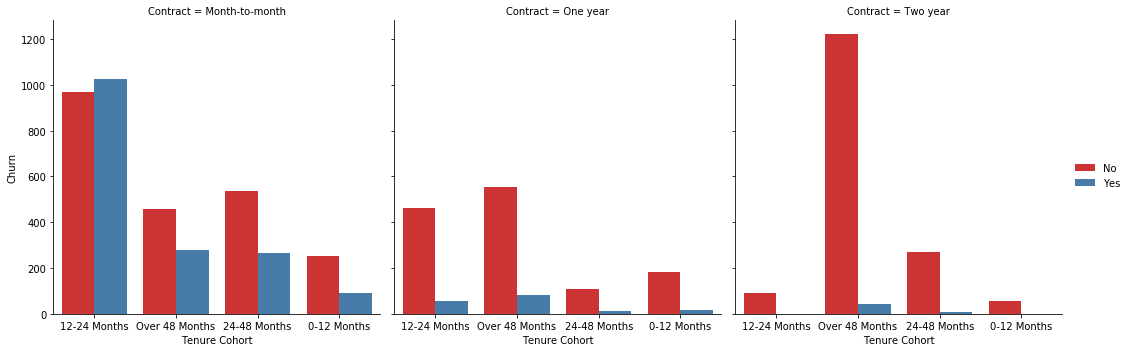

In [42]:
def countplot(x,hue,**kwargs):
    sns.countplot(x=x,hue=hue,**kwargs)
g = sns.FacetGrid(data=df_4cat_tenure,col='Contract',height=5)
g = g.map(countplot,'Tenure Cohort','Churn',palette='Set1').add_legend()


Counts per Tenure Cohort, separated out by contract type and colored by the Churn hue. As we saw before, month to month contract are related to the highest churn 


# Part 4: Predictive Modeling



In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [59]:
df_pruned = df.drop(['customerID','gender','PhoneService','MultipleLines'],axis=1,errors='ignore')
df_pruned.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
df_pruned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), object(13)
memory usage: 934.0+ KB


In [61]:
X = df_pruned.drop('Churn',axis=1)
X = pd.get_dummies(X,drop_first=True)

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
SeniorCitizen                            7032 non-null int64
tenure                                   7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
Partner_Yes                              7032 non-null uint8
Dependents_Yes                           7032 non-null uint8
InternetService_Fiber optic              7032 non-null uint8
InternetService_No                       7032 non-null uint8
OnlineSecurity_No internet service       7032 non-null uint8
OnlineSecurity_Yes                       7032 non-null uint8
OnlineBackup_No internet service         7032 non-null uint8
OnlineBackup_Yes                         7032 non-null uint8
DeviceProtection_No internet service     7032 non-null uint8
DeviceProtection_Yes                     7032 non-null uint8
TechSupport_No internet service    

In [64]:
y = df_pruned['Churn']

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [122]:
param_grid = {'max_depth':[2,3,7,11,20],'max_leaf_nodes':[2,3,7,11,20]}

In [123]:
tree_model = DecisionTreeClassifier()

In [124]:
grid = GridSearchCV(tree_model,param_grid)

In [125]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 7, 11, 20],
                         'max_leaf_nodes': [2, 3, 7, 11, 20]})

In [126]:
grid.best_params_

{'max_depth': 7, 'max_leaf_nodes': 7}

In [127]:
grid.best_estimator_.get_depth()

4

In [128]:
grid.best_estimator_.get_n_leaves()

7

In [129]:
predictions = grid.predict(X_test)

In [109]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score

In [130]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



Comparing to a default decision tree (without grid search)

In [117]:
tree2 = DecisionTreeClassifier()
tree2.fit(X_train,y_train)

DecisionTreeClassifier()

In [118]:
predictions2 = tree2.predict(X_test)

In [119]:
tree2.get_depth()

26

In [120]:
tree2.get_n_leaves()

1264

In [121]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

          No       0.87      0.78      0.82       557
         Yes       0.39      0.54      0.46       147

    accuracy                           0.73       704
   macro avg       0.63      0.66      0.64       704
weighted avg       0.77      0.73      0.74       704



As we see the default tree have lots of leaves and is very deep compared to the tree found by grid search. The accuracy is worst than the tree found by grid search too.

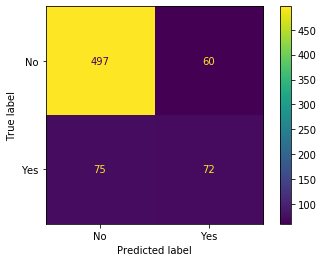

In [131]:
plot_confusion_matrix(grid,X_test,y_test)

As we see the rate of true positives is very low compared to the true negatives, this could happen due to the imbalance of the churn data.

In [132]:
feats = grid.best_estimator_.feature_importances_
feats

array([0.        , 0.54980487, 0.        , 0.        , 0.        ,
       0.        , 0.41542085, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03477428, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [134]:
df_feats = pd.DataFrame(index=X.columns, data=feats, columns=['Importance'])
df_feats.head()

,Importance
SeniorCitizen,0.000000
tenure,0.549805
MonthlyCharges,0.000000
TotalCharges,0.000000
Partner_Yes,0.000000


In [135]:
imp_feats = df_feats[df_feats['Importance'] > 0]
imp_feats

,Importance
tenure,0.549805
InternetService_Fiber optic,0.415421
StreamingTV_No internet service,0.034774


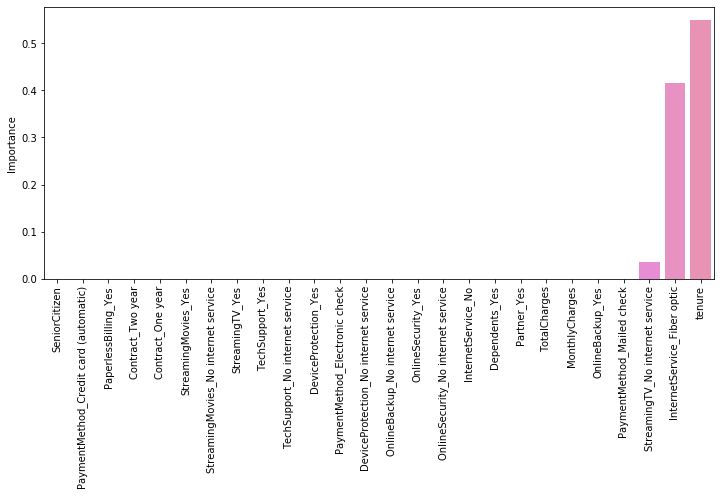

In [149]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_feats.sort_values('Importance'),x=df_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);


A few features have weight on the model

In [153]:
from sklearn.tree import plot_tree

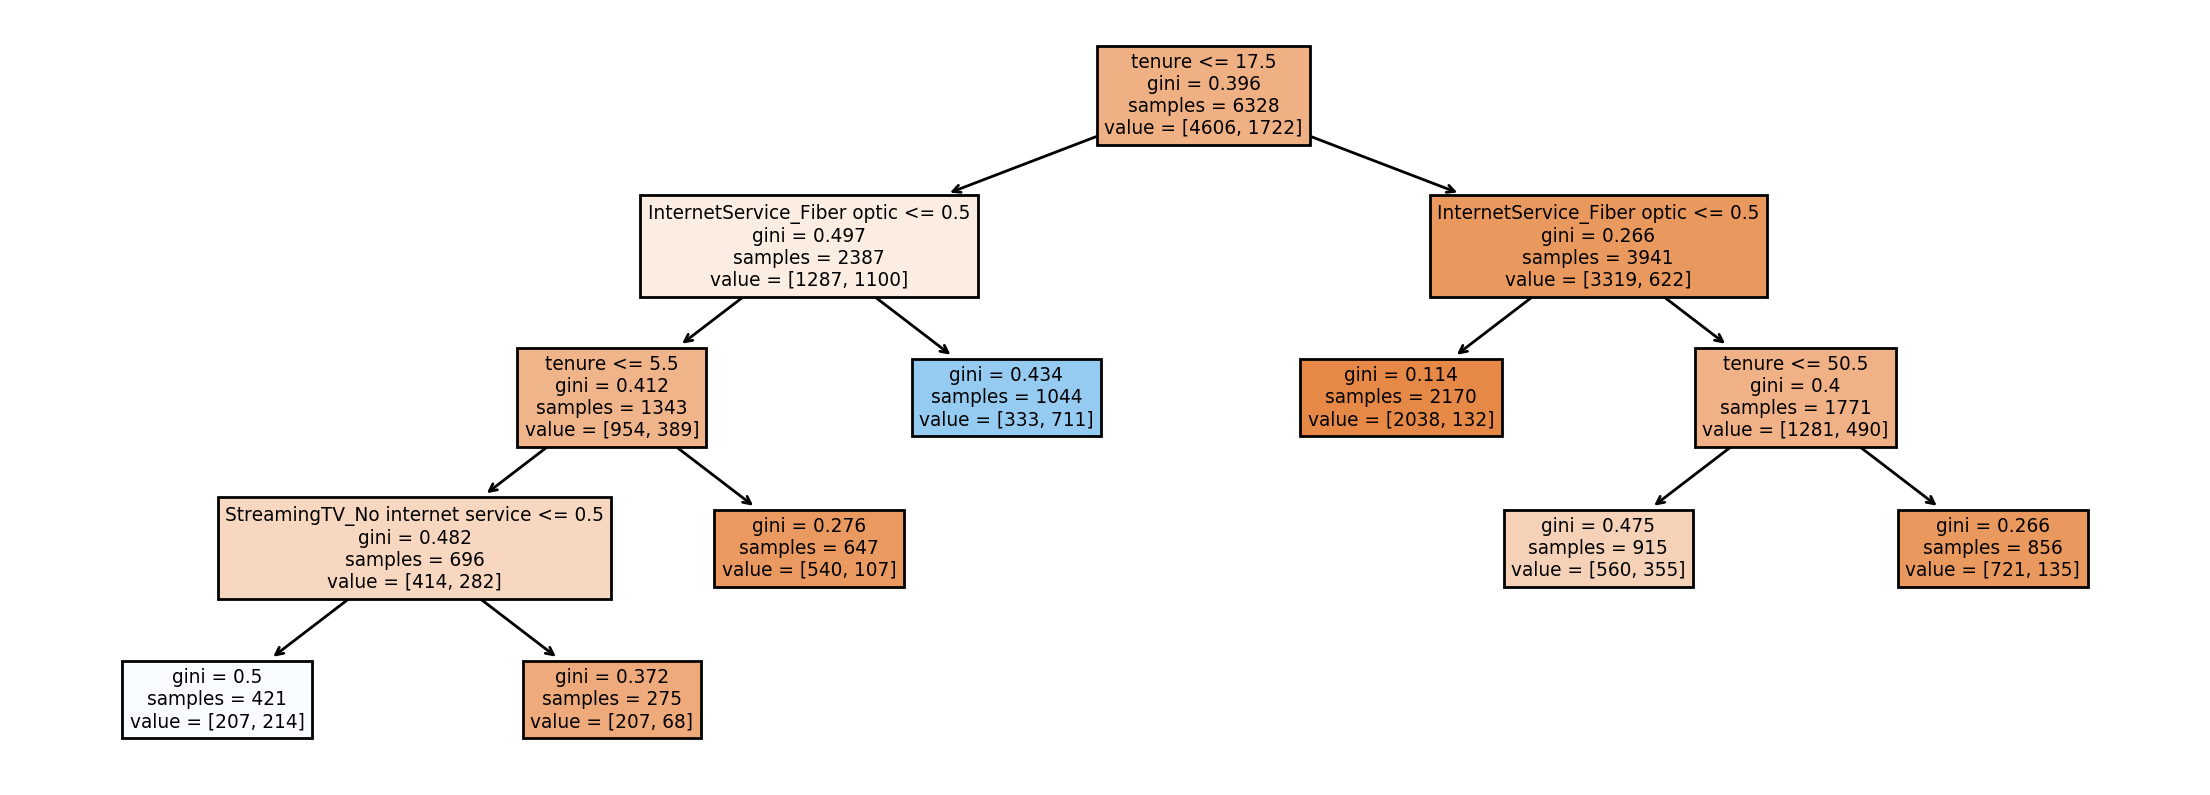

In [160]:
plt.figure(figsize=(14,5),dpi=200)
plot_tree(grid.best_estimator_,filled=True,feature_names=X.columns);

## Random Forest



In [161]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
grid_param = {'n_estimators':[210],'class_weight':['balanced','balanced_subsample']}

In [191]:
rfc = RandomForestClassifier()

In [192]:
grid = GridSearchCV(rfc,grid_param)

In [193]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'n_estimators': [210]})

In [194]:
grid.best_params_

{'class_weight': 'balanced', 'n_estimators': 210}

In [195]:
predictions = grid.predict(X_test)

In [196]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.45      0.47       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.78      0.79      0.79       704



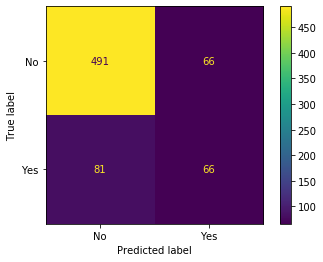

In [197]:
plot_confusion_matrix(grid,X_test,y_test)

## Boosted Trees



In [185]:
from sklearn.ensemble import AdaBoostClassifier

In [202]:
param_grid = {'n_estimators':[1,10,25,100,200]}

In [203]:
adc = AdaBoostClassifier()

In [204]:
grid = GridSearchCV(adc,param_grid)

In [205]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [1, 10, 25, 100, 200]})

In [206]:
grid.best_params_

{'n_estimators': 200}

In [207]:
predictions = grid.predict(X_test)

In [208]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



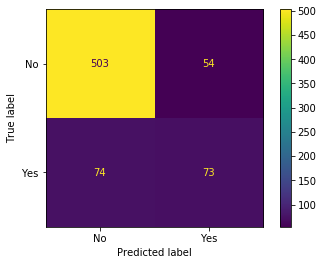

In [209]:
plot_confusion_matrix(grid,X_test,y_test)

We got best performance from an AdaBoostClassifier, but all performed about the same on the data set.